In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline

Algorithm to calculate Levenshtein distance and create a numpy matrix. In a ```m x n```-matrix, the Levenshtein distance  is at the position ```m, n```.

In [81]:
def lev(a, b):
  row, col = len(a), len(b)
  matrix = np.zeros((row + 1, col + 1), dtype=int) # matrix to store levenshtein matrix
  for i in range(0, row + 1):
    matrix[i][0] = i
  for j in range(0, col + 1):
    matrix[0][j] = j
  for i in range(1, row + 1):
    for j in range(1, col + 1):
      # delta is 1 if mismatch of characters
      delta = int(a[i-1] != b[j-1])
      matrix[i][j] = min(matrix[i-1][j] + 1,
                      matrix[i][j-1] + 1,
                      matrix[i-1][j-1] + delta)
  return(matrix[1:, 1:])

lev("peter", "petra")

array([[0, 1, 2, 3, 4],
       [1, 0, 1, 2, 3],
       [2, 1, 0, 1, 2],
       [3, 2, 1, 1, 2],
       [4, 3, 2, 1, 2]])

Algorithm for traversing the matrix and finding the path. The possible paths are stored in a list of tuples.  
Recursively calls itself for every possible path. Stores the depth of the branch in the tuple

In [82]:
def minCount(a, b, c, branches):
  minimum = min(a, b, c)
  i = [a,b,c].count(minimum)
  return minimum, branches * i

def findChange(matrix: np.array, changes: list, a, b, indexA, indexB, branches) -> list:
    # if the end of the matrix is reached, return
    if indexA == -1 or indexB == -1:
        return changes
    
    # find the minimum value in the matrix
    minimum, branchCount = minCount(matrix[indexA-1][indexB-1], matrix[indexA-1][indexB], matrix[indexA][indexB-1], branches)

    # if the letters of the words a and b on indexA and indexB are the same, check if the minimum is the diagonal value and call the function only on the diagonal
    # otherwise proceed to call all possible paths recursively
    if a[indexA] == b[indexB]:
      if(minimum == matrix[indexA-1][indexB-1]):
        (findChange(matrix, changes, a, b, indexA - 1, indexB - 1, branches))
        return changes

    else:
      if(minimum == matrix[indexA-1][indexB-1]):
        changes.append((a[indexA], b[indexB], branchCount))
        (findChange(matrix, changes, a, b, indexA - 1, indexB - 1, branchCount))
      if(minimum == matrix[indexA-1][indexB]):
        changes.append(('-', a[indexA], branchCount))
        (findChange(matrix, changes, a, b, indexA - 1, indexB, branchCount))
      if(minimum == matrix[indexA][indexB-1]):
        changes.append(('-', b[indexB], branchCount))
        (findChange(matrix, changes, a, b, indexA, indexB - 1, branchCount))
    return changes
    
a = "peter"
b = "petra"
change = []
findChange(lev(a,b), change, a, b, len(a)-1, len(b)-1, 1)
change


[('r', 'a', 2), ('e', 'r', 2), ('-', 'a', 2), ('-', 'e', 2)]

Load all names from the file and make it lowercase  
Create Dictionary to convert a character into an integer relating to the position of the character in the orderedAlphabet

In [83]:
# Read names from file
names = open("names.dat", "r").readlines()
nameCount = len(names)
for i in range(nameCount):
    names[i] = names[i].lower().removesuffix("\n")

In [84]:
# Creates sorted alphabet
orderedAlphabet = list(string.ascii_lowercase + "ä" + "ö" + "ü" + "-")
alphabetLength = orderedAlphabet.__len__()

In [85]:
#Creates dictionary to convert character to index
lettertoindex = {}
for key, value in zip(orderedAlphabet, range(alphabetLength)):
    lettertoindex[key] = value
lettertoindex

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 'ä': 26,
 'ö': 27,
 'ü': 28,
 '-': 29}

Initialise the NumPy-Array to store the likelyhood of occurence of each possible bigram combination of characters in the alphabet.
The Array is of size ```(alphabetLength)x(alphabetLength)```

In [86]:
heatmap = np.zeros((alphabetLength, alphabetLength), dtype=float)

Iterate over every possible pairing of firstnames. Create the Levenshtein-matrix of each pair and traverse it using the findChange algorithm.
Every returned edge of the paths is weighted relative to the depth of the branches. An edge is represented as a 3 element tuple ```(a, b, branchCount)``` with ```a``` and ```b``` being the characters that are replaced.
Every combination of characters represented by an edge is then inserted into the heatmap. The value is weighted relative to the depth of the branch and the Levenshtein-distance. The levenshtein distance is squared to devalue all character variations from word combinations that are dissimilar. The letter variations in ```Anne``` and ```Anna``` should be valued stronger than the letter variations of ```Michael``` and ```Patrick```.  
The order of occurence of the characters in the tuple should also play no role. The following edge ```('a','b',1)``` should count towards the bigrams ```ae``` and ```ea```.



In [87]:
for i in range(nameCount):
    for j in range(i+1, nameCount):
        a = names[i]
        b = names[j]
        matrix  = (lev(b, a))
        levdistance = matrix[len(b)-1, len(a)-1]
        lettervariations = findChange(matrix, [], b, a, len(b)-1, len(a)-1, 1)
        for change in lettervariations:
            heatmap[lettertoindex[change[0]], lettertoindex[change[1]]] += (1/change[2])/(levdistance**2)
            heatmap[lettertoindex[change[1]], lettertoindex[change[0]]] += (1/change[2])/(levdistance**2)

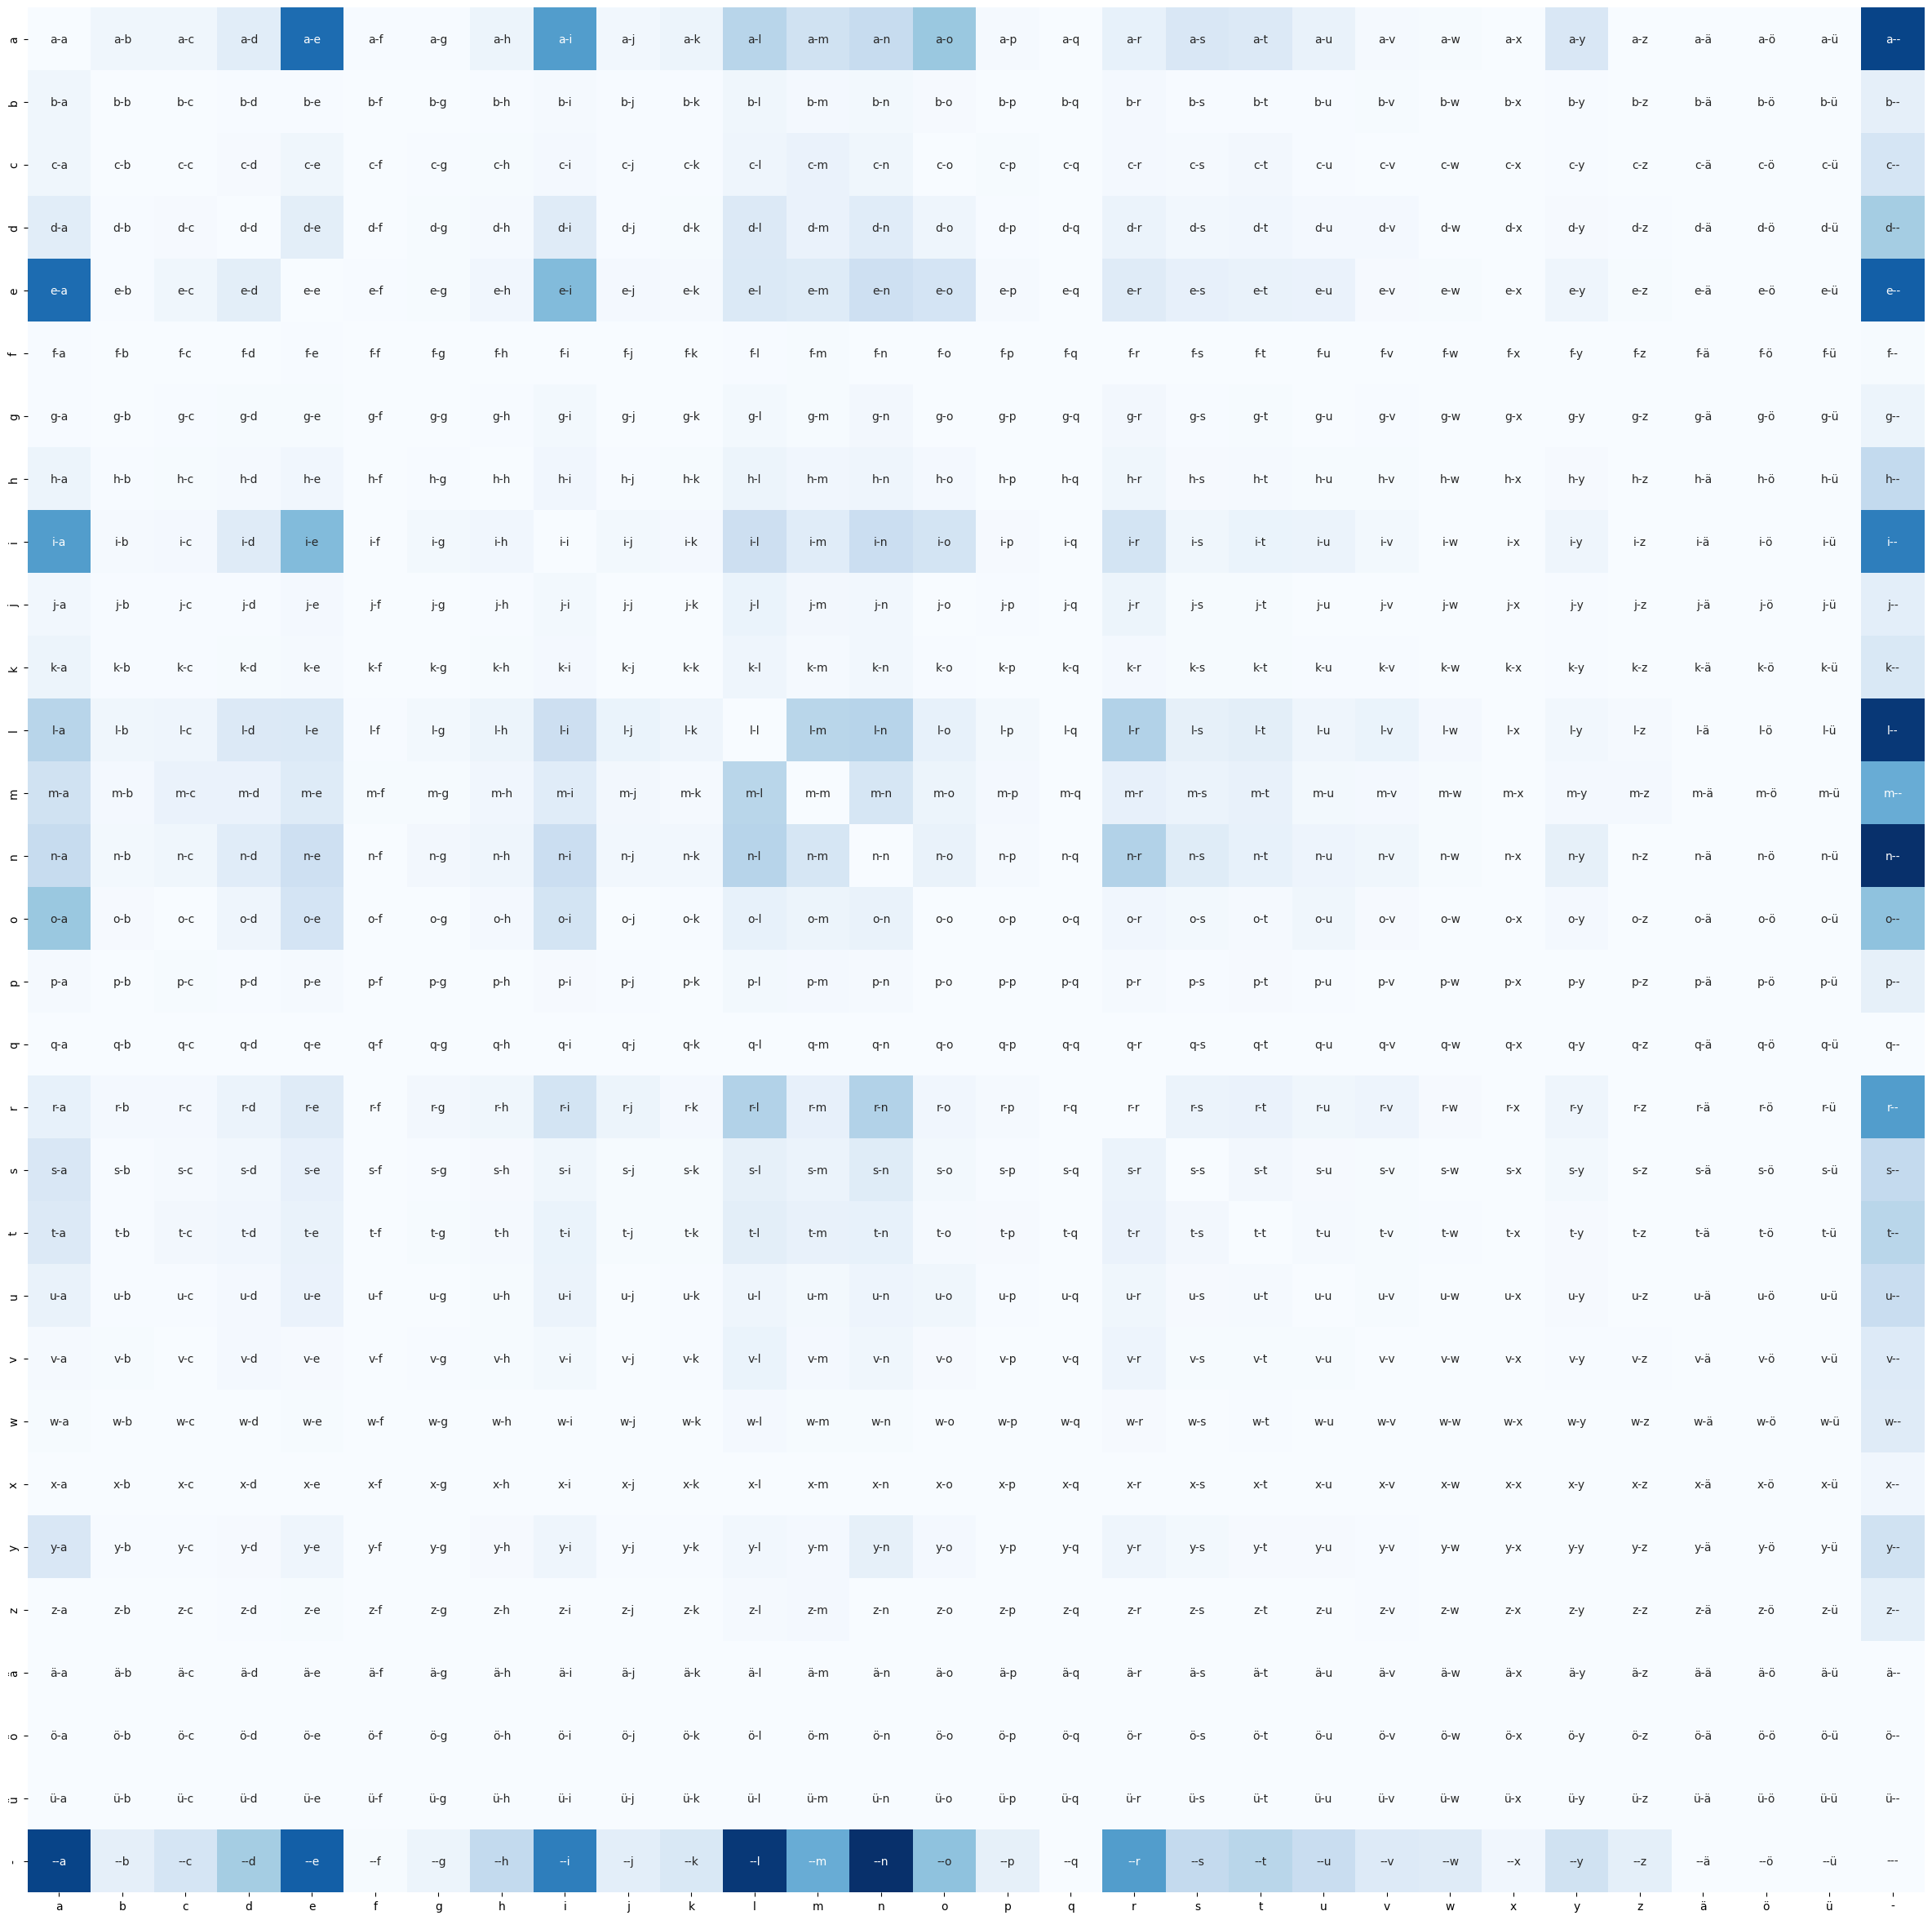

In [88]:
# display the heatmap using matplotlib and seaborn
annot = np.array(
    [str(x + "-" + y) for x in orderedAlphabet for y in orderedAlphabet]).reshape(alphabetLength, alphabetLength)

plt.figure(figsize=(alphabetLength, alphabetLength))
sns.heatmap(heatmap, cmap="Blues", fmt="s", annot=annot, cbar=False,
            xticklabels=orderedAlphabet, yticklabels=orderedAlphabet)
plt.show()